# Exploratory Data Analysis

## General information about the dataset

In [10]:
# Import libraries and set graphic parameters
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()
sns.set_palette('magma')
my_cmap = sns.color_palette("magma", as_cmap=True)
colors = my_cmap(np.linspace(0, 1, 8))

In [17]:
# Import the augmented dataset
df = pd.read_csv('../data/regularite-mensuelle-tgv-ext-data.csv',sep=',')

In [18]:
df.head()

,Unnamed: 0,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,...,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,nombre_objets_perdus_depart,nombre_objets_perdus_arrivee,Longitude_gare_depart,Lattitude_gare_depart,Longitude_gare_arrivee,Lattitude_gare_arrivee
0,0,2018-01,National,BORDEAUX SAINT-JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,...,10.924370,15.966387,5.042017,0.840336,105.0,157.0,-0.556697,44.825873,2.320514,48.841172
1,1,2018-01,National,BORDEAUX SAINT-JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,...,10.924370,15.966387,5.042017,0.840336,105.0,157.0,-0.556697,44.825873,2.320514,48.841172
2,2,2018-01,National,LA ROCHELLE,PARIS MONTPARNASSE,165,222,0,NaN,8,...,38.461538,11.538462,3.846154,0.000000,22.0,157.0,-1.145305,46.152690,2.320514,48.841172
3,3,2018-01,National,LA ROCHELLE,PARIS MONTPARNASSE,165,222,0,NaN,8,...,38.461538,11.538462,3.846154,0.000000,22.0,157.0,-1.145305,46.152690,2.320514,48.841172
4,4,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,...,15.384615,19.230769,0.000000,0.000000,157.0,26.0,2.320514,48.841172,-4.092103,47.994455


In [19]:
df.info()

# seperating the year and the month to have additional information
df['annee'] = df['date'].astype(str).str[0:4].astype(int)
df['mois'] = df['date'].astype(str).str[5:7].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15484 entries, 0 to 15483
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            15484 non-null  int64  
 1   date                                  15484 non-null  object 
 2   service                               15484 non-null  object 
 3   gare_depart                           15484 non-null  object 
 4   gare_arrivee                          15484 non-null  object 
 5   duree_moyenne                         15484 non-null  int64  
 6   nb_train_prevu                        15484 non-null  int64  
 7   nb_annulation                         15484 non-null  int64  
 8   commentaire_annulation                0 non-null      float64
 9   nb_train_depart_retard                15484 non-null  int64  
 10  retard_moyen_depart                   15484 non-null  float64
 11  retard_moyen_to

In [20]:
df.describe()

,Unnamed: 0,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,...,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,nombre_objets_perdus_depart,nombre_objets_perdus_arrivee,Longitude_gare_depart,Lattitude_gare_depart,Longitude_gare_arrivee,Lattitude_gare_arrivee,annee,mois
count,15484.000000,15484.000000,15484.000000,15484.000000,0.0,15484.000000,15484.000000,15484.000000,0.0,15484.000000,...,15484.000000,15484.000000,15484.000000,15484.000000,14517.000000,14517.000000,14517.000000,14517.000000,15484.000000,15484.000000
mean,7741.500000,161.830858,271.331374,11.959055,NaN,89.889563,11.501713,3.023609,NaN,36.321881,...,6.821684,6.813630,85.096745,84.791139,2.594665,47.801686,2.586741,47.828244,2020.245221,6.233338
std,4469.990119,85.363740,177.382592,27.498771,NaN,91.993947,12.725040,5.615869,NaN,30.553310,...,7.815620,9.707477,78.245511,78.324075,2.175189,2.017640,2.169047,2.007013,1.608443,3.441692
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-229.269444,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,-4.478903,42.696292,-4.478903,42.696292,2018.000000,1.000000
25%,3870.750000,96.000000,151.000000,0.000000,NaN,22.000000,5.283333,1.091565,NaN,15.000000,...,0.000000,0.000000,9.000000,9.000000,2.320514,46.765343,2.320514,46.765343,2019.000000,3.000000
50%,7741.500000,157.000000,228.000000,3.000000,NaN,56.000000,9.150000,2.182887,NaN,28.000000,...,5.263158,3.571429,63.000000,63.000000,2.373520,48.841172,2.373520,48.841172,2020.000000,6.000000
75%,11612.250000,207.000000,378.000000,10.000000,NaN,130.000000,14.624620,3.733333,NaN,50.000000,...,10.000000,9.725275,157.000000,157.000000,3.089986,48.844888,3.089986,48.844888,2022.000000,9.000000
max,15483.000000,786.000000,1075.000000,297.000000,NaN,596.000000,316.188095,84.516667,NaN,376.000000,...,100.000000,100.000000,262.000000,262.000000,7.734584,51.030470,7.734584,51.030470,2023.000000,12.000000


In [21]:
df.count()

Unnamed: 0                              15484
date                                    15484
service                                 15484
gare_depart                             15484
gare_arrivee                            15484
duree_moyenne                           15484
nb_train_prevu                          15484
nb_annulation                           15484
commentaire_annulation                      0
nb_train_depart_retard                  15484
retard_moyen_depart                     15484
retard_moyen_tous_trains_depart         15484
commentaire_retards_depart                  0
nb_train_retard_arrivee                 15484
retard_moyen_arrivee                    15484
retard_moyen_tous_trains_arrivee        15484
commentaires_retard_arrivee              1313
nb_train_retard_sup_15                  15484
retard_moyen_trains_retard_sup15        15484
nb_train_retard_sup_30                  15484
nb_train_retard_sup_60                  15484
prct_cause_externe                

In [22]:
# we will not treat commentaries
df = df.drop(columns=['commentaire_annulation', 'commentaire_retards_depart'])

In [23]:
# watch the information about the worse months regarding the number of late train at the arrived station
df.sort_values(by='nb_train_retard_arrivee').head(10)

,Unnamed: 0,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,...,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,nombre_objets_perdus_depart,nombre_objets_perdus_arrivee,Longitude_gare_depart,Lattitude_gare_depart,Longitude_gare_arrivee,Lattitude_gare_arrivee,annee,mois
9312,9312,2021-04,National,PARIS GARE DE LYON,MÂCON LOCHÉ TGV,96,185,91,2,2.425000,...,0.0,0.0,95.0,0.0,2.373520,48.844888,4.778876,46.282884,2021,4
6516,6516,2020-04,National,DUNKERQUE,PARIS GARE DU NORD,0,0,15,0,0.000000,...,0.0,0.0,0.0,1.0,2.368961,51.030470,2.355151,48.880185,2020,4
6618,6618,2020-04,National,PARIS GARE DE LYON,CHAMBÉRY - CHALLES-LES-EAUX,0,0,15,0,0.000000,...,0.0,0.0,0.0,0.0,2.373520,48.844888,5.919547,45.571302,2020,4
6617,6617,2020-04,National,PARIS GARE DE LYON,CHAMBÉRY - CHALLES-LES-EAUX,0,0,15,0,0.000000,...,0.0,0.0,0.0,0.0,2.373520,48.844888,5.919547,45.571302,2020,4
6826,6826,2020-05,National,STRASBOURG,NANTES,0,0,2,0,0.000000,...,0.0,0.0,14.0,3.0,7.734584,48.584967,-1.542356,47.216148,2020,5
6827,6827,2020-05,National,NANTES,STRASBOURG,0,0,2,0,0.000000,...,0.0,0.0,3.0,14.0,-1.542356,47.216148,7.734584,48.584967,2020,5
9468,9468,2021-05,International,PARIS GARE DE LYON,ZURICH,244,69,12,4,10.029167,...,0.0,0.0,126.0,0.0,2.373520,48.844888,NaN,NaN,2021,5
9467,9467,2021-05,International,PARIS GARE DE LYON,ZURICH,244,69,12,4,10.029167,...,0.0,0.0,126.0,0.0,2.373520,48.844888,NaN,NaN,2021,5
12881,12881,2022-07,International,MARSEILLE SAINT-CHARLES,MADRID,463,31,2,6,10.208333,...,0.0,0.0,162.0,0.0,5.380407,43.302666,NaN,NaN,2022,7
12334,12334,2022-05,International,MARSEILLE SAINT-CHARLES,MADRID,463,27,0,2,1.658333,...,0.0,0.0,112.0,0.0,5.380407,43.302666,NaN,NaN,2022,5


## Analysis of variables through time

<Axes: xlabel='date'>

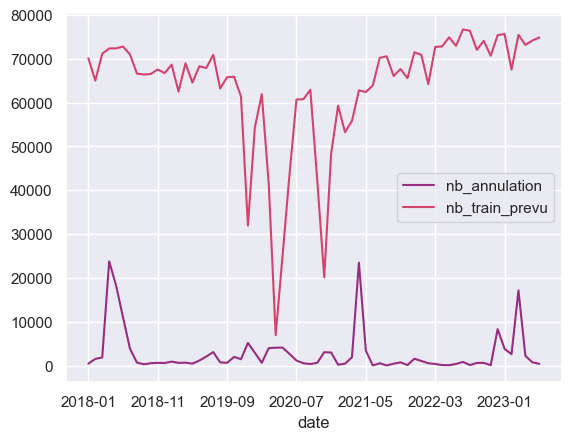

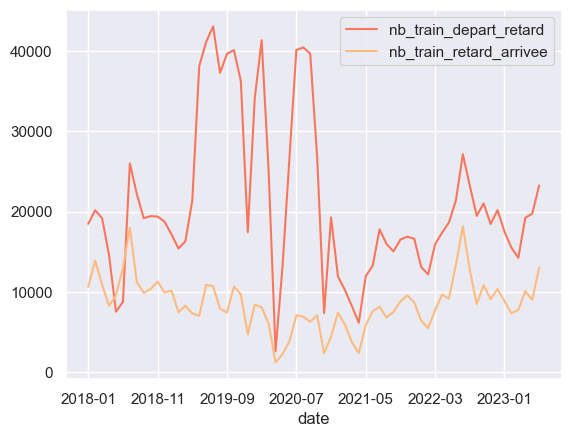

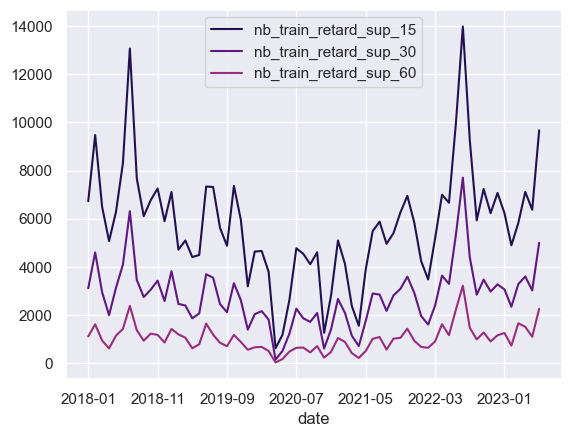

In [24]:
df1 = df.groupby('date').sum()[['nb_train_prevu','nb_annulation','nb_train_depart_retard','nb_train_retard_arrivee', 'nb_train_retard_sup_15', 'nb_train_retard_sup_30', 'nb_train_retard_sup_60']].reset_index()
df1[['date','nb_annulation','nb_train_prevu']].set_index('date').plot(color = colors[3:5])
df1[['date','nb_train_depart_retard','nb_train_retard_arrivee']].set_index('date').plot(color = colors[5:7])
df1[['date','nb_train_retard_sup_15', 'nb_train_retard_sup_30', 'nb_train_retard_sup_60']].set_index('date').plot(color = colors[1:4])

# big fluctuation due to covid period
# cancelation peak:
    #2018-04 et 2018-05: grève des cheminots
    #2021-04: période de confinement du 3 avril au 3 mai 2021
    #2023-03: grève contre la réforme des retraites

In [25]:
# looking for the worse months, no matter the stations
df1.sort_values(by='nb_annulation', ascending=False).head(10)

,date,nb_train_prevu,nb_annulation,nb_train_depart_retard,nb_train_retard_arrivee,nb_train_retard_sup_15,nb_train_retard_sup_30,nb_train_retard_sup_60
3,2018-04,72350,23816,14557,8253,5066,1984,600
39,2021-04,62791,23515,6143,2374,1541,699,204
4,2018-05,72382,18276,7520,9574,6281,3122,1132
62,2023-03,75462,17174,14239,7747,5821,3277,1644
5,2018-06,72792,11016,8751,12981,8307,4088,1412
59,2022-12,75386,8359,20181,10350,7067,3263,1144
23,2019-12,31949,5198,17443,4684,3181,1383,548
28,2020-05,25211,4141,13085,2210,1167,495,158
27,2020-04,6974,4123,2614,1195,609,136,17
26,2020-03,41495,4026,25133,6054,3792,1803,494


## Other repartition analysis

In [26]:
df['count']=1
df2 = df.groupby(['service']).count()['count']
df.drop(columns=['count'], inplace=True)
df2.head()

service
International     1670
National         13814
Name: count, dtype: int64

<Axes: ylabel='count'>

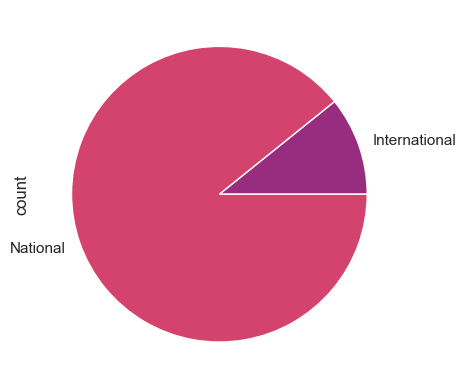

In [27]:
# watching for the proportion of national and international train in our dataset
df2.plot.pie(y='count', colors = colors[3:5])

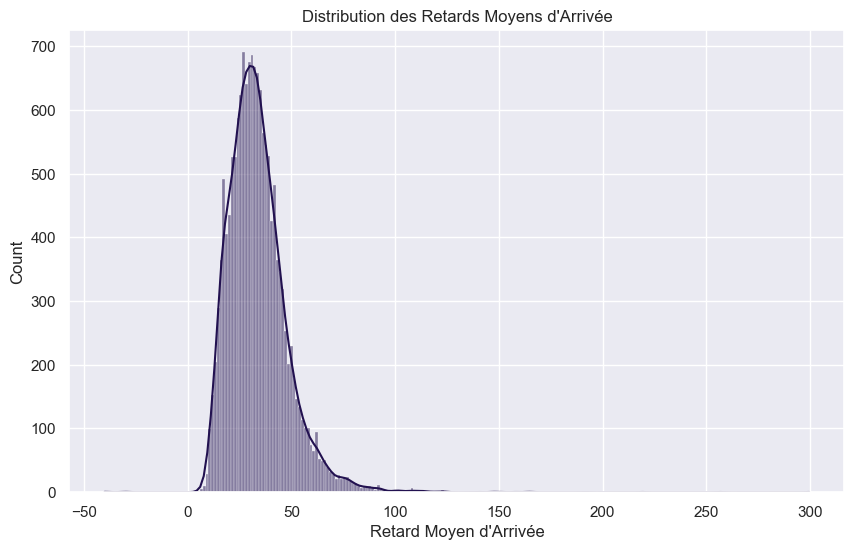

In [28]:
# watching for the distribution of late time at the arrived station
plt.figure(figsize=(10, 6))
sns.histplot(df[df['retard_moyen_arrivee'] != 0]['retard_moyen_arrivee'], kde=True, color=colors[1])
plt.title("Distribution des Retards Moyens d'Arrivée")
plt.xlabel("Retard Moyen d'Arrivée")
plt.show()


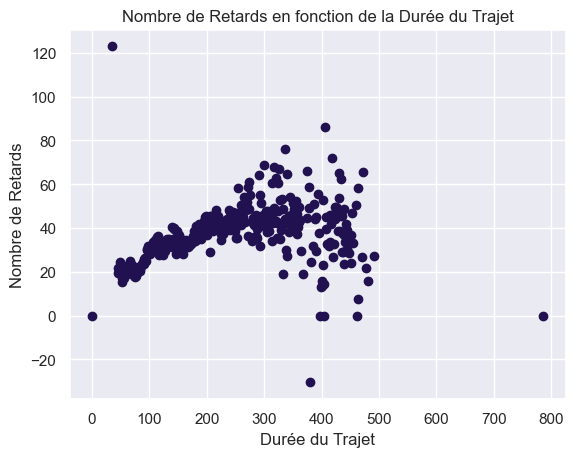

In [30]:
# plotting the mean late according to the mean journey time
df_grouped = df.groupby('duree_moyenne')['retard_moyen_arrivee'].mean().reset_index()

plt.scatter(df_grouped['duree_moyenne'], df_grouped['retard_moyen_arrivee'])
plt.xlabel('Durée du Trajet')
plt.ylabel('Nombre de Retards')
plt.title('Nombre de Retards en fonction de la Durée du Trajet')
plt.show()

## Correlation relations

<Axes: >

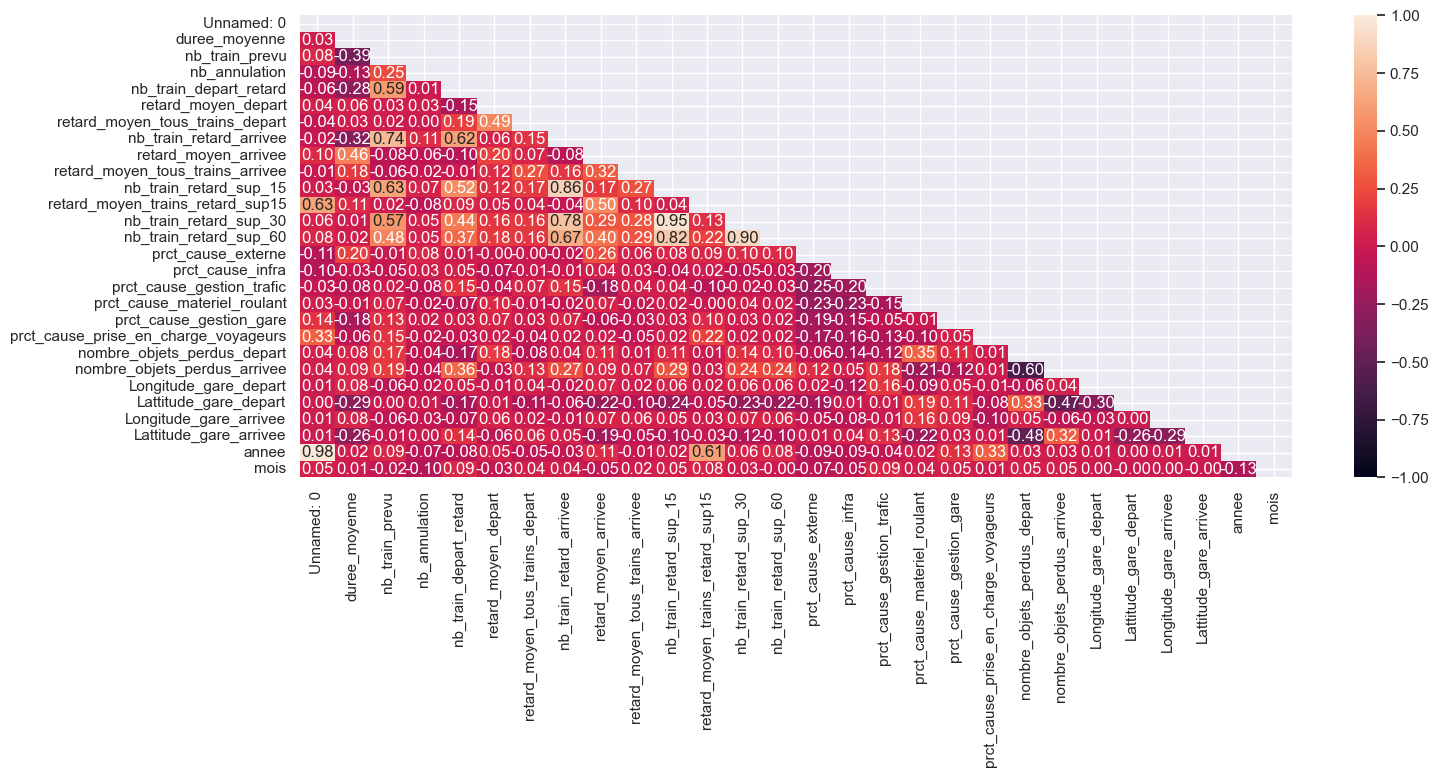

In [132]:
# correlation matrix with all the variables
plt.figure(figsize=(16, 6))
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, fmt = '.2f')


Text(0.5, 1.0, 'Features Correlating with mean arrived late')

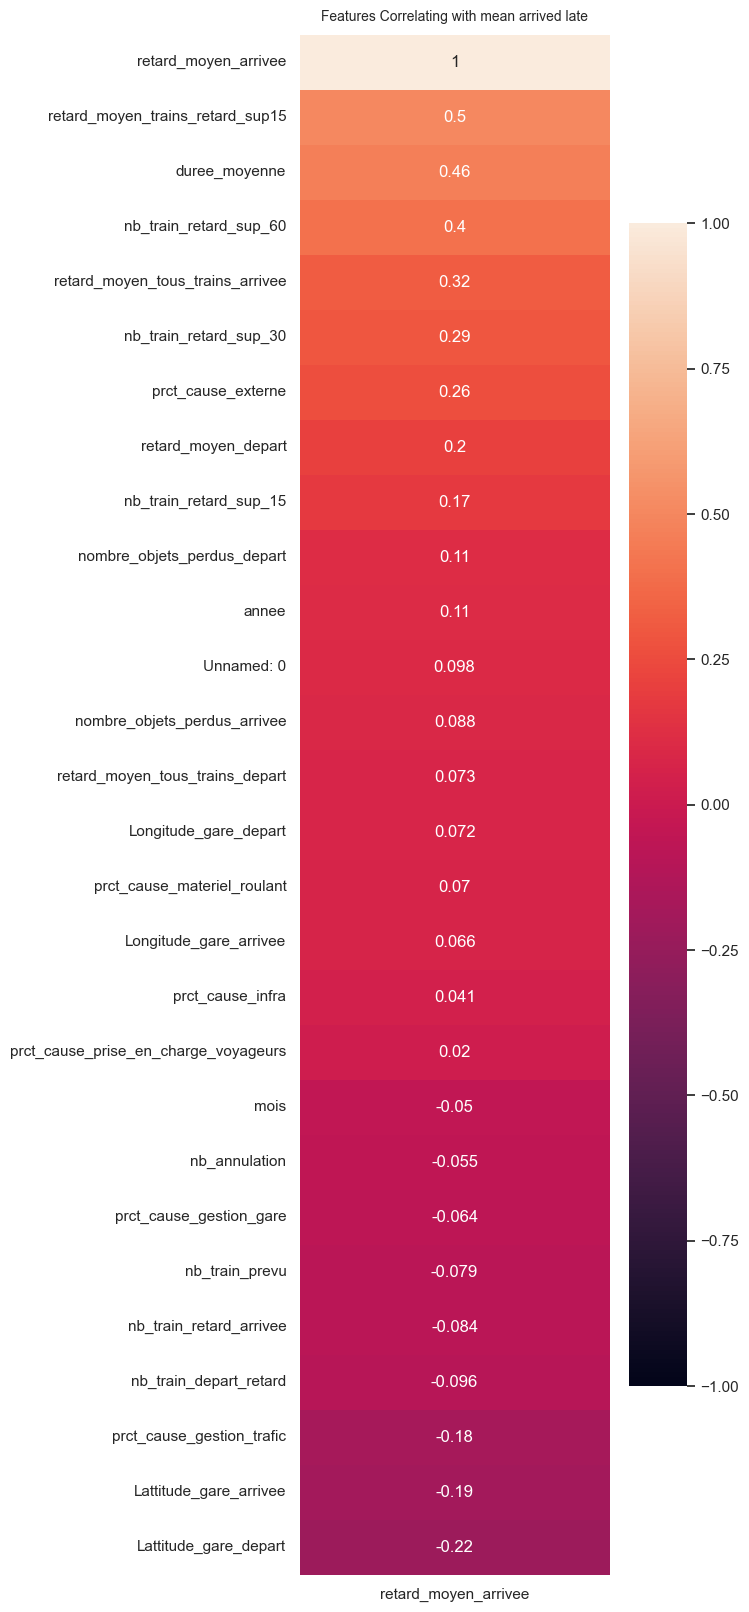

In [147]:
# looking for the most important variables that correlate with the late time at the arrived station
plt.figure(figsize=(5,20))
heatmap_retard = sns.heatmap(corr[['retard_moyen_arrivee']].sort_values(by='retard_moyen_arrivee', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap_retard.set_title('Features Correlating with mean arrived late', fontdict={'fontsize':10}, pad=10)

## Principal Component Analysis

In [140]:
X = df.select_dtypes(include=np.number).drop(columns = ['prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 
'prct_cause_prise_en_charge_voyageurs', 'nombre_objets_perdus_depart', 'nombre_objets_perdus_arrivee']).dropna().copy()
y = X.pop('retard_moyen_arrivee')
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,6.334121,-3.339163,0.762359,-0.288772,0.662955,0.791767,-0.995222,-1.326234,0.730770,1.721742,-0.228964,-1.219829,-0.489748,-0.423230,0.065593,1.474316,0.913652,-0.273918,0.029326
1,6.334130,-3.339034,0.762399,-0.288766,0.662945,0.791765,-0.995216,-1.326225,0.730765,1.721739,-0.228936,-1.219890,-0.489709,-0.423226,0.065604,1.474287,0.913644,-0.273915,0.029170
2,-1.531623,-2.377357,-0.271428,-0.269763,0.588941,0.868653,-1.715222,-1.071311,-0.025789,1.368344,0.019546,-0.277677,-0.288284,0.250485,-0.183415,0.725840,0.086637,-0.176457,0.032188
3,-1.531614,-2.377228,-0.271388,-0.269757,0.588931,0.868651,-1.715216,-1.071302,-0.025794,1.368342,0.019574,-0.277737,-0.288245,0.250490,-0.183404,0.725811,0.086630,-0.176454,0.032031
4,-0.456095,-2.222722,-0.606648,0.333181,0.616360,1.248183,-2.486218,-0.062627,2.236290,-1.043762,-0.364712,0.503317,0.037687,-0.206277,-0.291344,-0.327299,0.204097,0.089318,0.031162


In [141]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Unnamed: 0,0.041468,0.576976,0.177268,0.026765,-0.042803,-0.010335,0.027120,0.040689,-0.024315,-0.011633,0.125081,-0.269234,0.173627,0.020515,0.049125,-0.130127,-0.033502,0.016566,-0.699099
duree_moyenne,-0.030135,0.144210,-0.491540,-0.083133,0.317474,0.049086,-0.120575,0.214029,0.251259,0.233347,-0.207841,-0.129713,0.146600,-0.585853,-0.066874,-0.003360,-0.133103,0.041312,-0.000326
nb_train_prevu,0.343552,-0.059896,0.316298,-0.094138,-0.043435,0.095915,0.134360,0.070469,0.097677,0.041890,-0.049638,-0.303502,-0.478216,-0.216289,-0.593527,-0.032715,0.026021,-0.002672,-0.000036
nb_annulation,0.045795,-0.112576,0.101173,-0.082355,-0.091691,0.572296,0.176087,0.663111,-0.335404,0.021931,-0.076777,0.063972,0.146039,0.000589,0.126837,-0.033850,0.004071,0.003997,-0.000787
nb_train_depart_retard,0.298134,-0.125371,0.220477,0.179969,0.058858,-0.225982,0.171690,-0.090532,-0.062990,0.077733,-0.589307,-0.077347,-0.008756,-0.133404,0.423962,-0.400471,0.020536,0.022385,0.001177
retard_moyen_depart,0.069435,0.062527,-0.319723,0.083663,-0.574204,0.130426,0.180098,0.016420,0.302681,0.087036,0.237560,-0.024961,-0.411137,-0.125711,0.388034,-0.104443,0.006763,-0.003215,-0.000325
retard_moyen_tous_trains_depart,0.128500,-0.032119,-0.297367,0.290151,-0.528740,-0.072487,0.148377,-0.034840,-0.022274,0.016311,-0.315026,-0.094315,0.438077,0.146657,-0.410943,0.101960,-0.011318,0.008650,0.000450
nb_train_retard_arrivee,0.416699,-0.120589,0.156832,-0.035644,-0.038535,-0.034946,-0.022256,-0.067425,0.000369,-0.039953,0.118144,-0.101351,0.132902,-0.112620,0.244013,0.552366,-0.557499,0.215813,-0.001629
retard_moyen_tous_trains_arrivee,0.144234,0.039054,-0.310303,0.031195,-0.102507,-0.014461,-0.509455,-0.027381,-0.556081,-0.415939,-0.056845,-0.213646,-0.245889,-0.104296,0.029313,-0.077433,0.000329,0.009866,-0.000636
nb_train_retard_sup_15,0.445391,-0.028990,-0.065236,-0.073500,0.090275,-0.001012,-0.047684,-0.004337,0.068688,0.013768,0.122032,-0.073357,0.174425,-0.013658,0.132508,0.214593,0.401163,-0.707357,-0.000709


In [142]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
#!pip install plotly
#!pip install nbformat

n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(X_scaled)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median late'

fig = px.scatter_matrix(
    components,
    color=y,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [143]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X_scaled)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)